In [181]:
import pandas as pd
import numpy as np

# Read the CSV files into DataFrames
df1 = pd.read_csv('questionnaire.csv')
df2 = pd.read_csv('demographic.csv')
df3 = pd.read_csv('diet.csv')
df4 = pd.read_csv('examination.csv')

# Merge the DataFrames on the 'seqn' column
merged_df = df1.merge(df2, on='SEQN').merge(df3, on='SEQN').merge(df4, on='SEQN')

# Print the merged DataFrame
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(merged_df.shape)


(10175, 953)
(10175, 47)
(9813, 168)
(9813, 224)
(9813, 1389)


In [182]:
merged_df.isnull().sum()

SEQN           0
ACD011A     4250
ACD011B     9797
ACD011C     9649
ACD040      7506
            ... 
CSXSLTRT    8218
CSXSLTRG    8218
CSXNART     8200
CSXNARG     8200
CSAEFFRT    6276
Length: 1389, dtype: int64

In [183]:
# List of columns to keep
columns_to_keep = [
    'SEQN', 'RIAGENDR', 'RIDAGEYR', 'BPXDI1', 'BPXDI3', 'BPXSY1', 'BPXSY3', 'PEASCST1', 'PEASCCT1', 'BMXBMI', 'BMXHT', 'BMXWAIST', 'BMXWT', 'DR1TCHOL',
    'DRQSDIET', 'DRQSPREP', 'MCQ010', 'MCQ160F', 'CDQ001', 'OCQ210',
    'PAQ650', 'PAQ665', 'DPQ090', 'DPQ060', 'DPQ050', 'DPQ040', 'DPQ030', 'DPQ020','ALQ151', 'ALQ120Q', 'ALQ130', 'SMQ020', 'SMQ040', 'DBQ700', 'HSD010', 'SLD010H'
]

# Drop all columns except for the specified ones
merged_df = merged_df[columns_to_keep]

# Drop all rows where RIDAGEYR is less than 18
merged_df = merged_df[merged_df['RIDAGEYR'] >= 18]

merged_df.head()

,SEQN,RIAGENDR,RIDAGEYR,BPXDI1,BPXDI3,BPXSY1,BPXSY3,PEASCST1,PEASCCT1,BMXBMI,...,DPQ030,DPQ020,ALQ151,ALQ120Q,ALQ130,SMQ020,SMQ040,DBQ700,HSD010,SLD010H
0,73557,1,69,72.0,74.0,122.0,102.0,1,NaN,26.7,...,0.0,0.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,7.0
1,73558,1,54,62.0,42.0,156.0,156.0,1,NaN,28.6,...,0.0,0.0,1.0,7.0,4.0,1.0,2.0,3.0,4.0,9.0
2,73559,1,72,90.0,80.0,140.0,146.0,1,NaN,28.9,...,0.0,0.0,2.0,0.0,NaN,1.0,3.0,3.0,3.0,8.0
4,73561,2,73,86.0,86.0,136.0,142.0,1,NaN,19.7,...,0.0,1.0,2.0,0.0,NaN,2.0,NaN,2.0,5.0,9.0
5,73562,1,56,84.0,80.0,160.0,154.0,1,NaN,41.7,...,3.0,3.0,2.0,5.0,1.0,1.0,3.0,5.0,5.0,5.0


In [184]:
merged_df.isnull().sum()

SEQN           0
RIAGENDR       0
RIDAGEYR       0
BPXDI1       498
BPXDI3       300
BPXSY1       498
BPXSY3       300
PEASCST1       0
PEASCCT1    5713
BMXBMI        77
BMXHT         67
BMXWAIST     337
BMXWT         64
DR1TCHOL     568
DRQSDIET     528
DRQSPREP     528
MCQ010         0
MCQ160F      336
CDQ001      2216
OCQ210      4996
PAQ650         0
PAQ665         0
DPQ090       531
DPQ060       530
DPQ050       529
DPQ040       529
DPQ030       529
DPQ020       528
ALQ151      1447
ALQ120Q     1445
ALQ130      2328
SMQ020         0
SMQ040      3434
DBQ700         0
HSD010       480
SLD010H        3
dtype: int64

In [185]:
merged_df.notnull().sum()

SEQN        5924
RIAGENDR    5924
RIDAGEYR    5924
BPXDI1      5426
BPXDI3      5624
BPXSY1      5426
BPXSY3      5624
PEASCST1    5924
PEASCCT1     211
BMXBMI      5847
BMXHT       5857
BMXWAIST    5587
BMXWT       5860
DR1TCHOL    5356
DRQSDIET    5396
DRQSPREP    5396
MCQ010      5924
MCQ160F     5588
CDQ001      3708
OCQ210       928
PAQ650      5924
PAQ665      5924
DPQ090      5393
DPQ060      5394
DPQ050      5395
DPQ040      5395
DPQ030      5395
DPQ020      5396
ALQ151      4477
ALQ120Q     4479
ALQ130      3596
SMQ020      5924
SMQ040      2490
DBQ700      5924
HSD010      5444
SLD010H     5921
dtype: int64

In [186]:
# Drop all columns with less than 2000 non-null values
merged_df = merged_df.dropna(thresh=2000, axis=1)

# Print the resulting DataFrame
print(merged_df)

       SEQN  RIAGENDR  RIDAGEYR  BPXDI1  BPXDI3  BPXSY1  BPXSY3  PEASCST1  \
0     73557         1        69    72.0    74.0   122.0   102.0         1   
1     73558         1        54    62.0    42.0   156.0   156.0         1   
2     73559         1        72    90.0    80.0   140.0   146.0         1   
4     73561         2        73    86.0    86.0   136.0   142.0         1   
5     73562         1        56    84.0    80.0   160.0   154.0         1   
...     ...       ...       ...     ...     ...     ...     ...       ...   
9804  83723         1        61     NaN    68.0     NaN   142.0         1   
9805  83724         1        80    70.0    66.0   164.0   168.0         1   
9807  83726         1        40     NaN     NaN     NaN     NaN         3   
9808  83727         1        26    68.0    76.0   110.0   112.0         1   
9810  83729         2        42    82.0    80.0   136.0   138.0         1   

      BMXBMI  BMXHT  ...  DPQ030  DPQ020  ALQ151  ALQ120Q  ALQ130  SMQ020  

In [187]:
# Assuming merged_df is already defined

# Count the number of rows with any null values
rows_with_nulls = merged_df.isnull().any(axis=1).sum()

# Print the number of rows with any null values
print(f"Number of rows with any null values: {rows_with_nulls}")

Number of rows with any null values: 5039


In [188]:
# Rename the columns as specified
new_column_names = {
    'SEQN': 'ID',
    'RIAGENDR': 'Gender',
    'RIDAGEYR': 'Age',
    'BPXDI1': 'DiasBP1',
    'BPXDI3': 'DiasBP2',
    'BPXSY1': 'SysBP1',
    'BPXSY3': 'SysBP2',
    'PEASCST1': 'BPStatus',
    'BMXBMI': 'BMI',
    'BMXHT': 'Height',
    'BMXWAIST': 'Waist',
    'BMXWT': 'Weight',
    'DR1TCHOL': 'CholLvl',
    'DRQSDIET': 'Diet',
    'DRQSPREP': 'SaltFreq',
    'MCQ010': 'Asthema',
    'MCQ160F': 'Stroke',
    'PAQ650': 'VigActivity',
    'PAQ665': 'ModActivity',
    'DPQ090': 'FeelSuicidal',
    'DPQ060': 'FeelLetDown',
    'DPQ050': 'FeelPoorEating',
    'DPQ040': 'FeelTired',
    'DPQ030': 'SleepTroubles',
    'DPQ020': 'FeelDep',
    'ALQ151': 'AlcConsumpMoreThanXMostDays',
    'ALQ120Q': 'AlcConsumpFreq',
    'ALQ130': 'AlcConsumpAmtPerDrinkDay',
    'SMQ020': '100Cigs',
    'DBQ700': 'OvrDietHealth',
    'HSD010': 'GenHealth',
    'SLD010H': 'SleepDuringWork',
    'SMQ040': 'Smoker',
    'OCQ210': 'WorkHoursMoreThan35'
}

merged_df.rename(columns=new_column_names, inplace=True)

# Show the first few rows to verify the changes
merged_df.head()

,ID,Gender,Age,DiasBP1,DiasBP2,SysBP1,SysBP2,BPStatus,BMI,Height,...,SleepTroubles,FeelDep,AlcConsumpMoreThanXMostDays,AlcConsumpFreq,AlcConsumpAmtPerDrinkDay,100Cigs,Smoker,OvrDietHealth,GenHealth,SleepDuringWork
0,73557,1,69,72.0,74.0,122.0,102.0,1,26.7,171.3,...,0.0,0.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,7.0
1,73558,1,54,62.0,42.0,156.0,156.0,1,28.6,176.8,...,0.0,0.0,1.0,7.0,4.0,1.0,2.0,3.0,4.0,9.0
2,73559,1,72,90.0,80.0,140.0,146.0,1,28.9,175.3,...,0.0,0.0,2.0,0.0,NaN,1.0,3.0,3.0,3.0,8.0
4,73561,2,73,86.0,86.0,136.0,142.0,1,19.7,162.4,...,0.0,1.0,2.0,0.0,NaN,2.0,NaN,2.0,5.0,9.0
5,73562,1,56,84.0,80.0,160.0,154.0,1,41.7,158.7,...,3.0,3.0,2.0,5.0,1.0,1.0,3.0,5.0,5.0,5.0


In [189]:
merged_df.shape

(5924, 34)

In [190]:
# Remove records where the person is under 20 years old
merged_df = merged_df[merged_df['Age'] >= 20]

# Show new shape
merged_df.shape

(5588, 34)

In [191]:
merged_df.isnull().sum()

ID                                0
Gender                            0
Age                               0
DiasBP1                         477
DiasBP2                         281
SysBP1                          477
SysBP2                          281
BPStatus                          0
BMI                              68
Height                           58
Waist                           318
Weight                           55
CholLvl                         541
Diet                            502
SaltFreq                        502
Asthema                           0
Stroke                            0
CDQ001                         1880
VigActivity                       0
ModActivity                       0
FeelSuicidal                    513
FeelLetDown                     512
FeelPoorEating                  511
FeelTired                       511
SleepTroubles                   511
FeelDep                         510
AlcConsumpMoreThanXMostDays    1269
AlcConsumpFreq              

In [192]:
merged_df.head(20)

,ID,Gender,Age,DiasBP1,DiasBP2,SysBP1,SysBP2,BPStatus,BMI,Height,...,SleepTroubles,FeelDep,AlcConsumpMoreThanXMostDays,AlcConsumpFreq,AlcConsumpAmtPerDrinkDay,100Cigs,Smoker,OvrDietHealth,GenHealth,SleepDuringWork
0,73557,1,69,72.0,74.0,122.0,102.0,1,26.7,171.3,...,0.0,0.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,7.0
1,73558,1,54,62.0,42.0,156.0,156.0,1,28.6,176.8,...,0.0,0.0,1.0,7.0,4.0,1.0,2.0,3.0,4.0,9.0
2,73559,1,72,90.0,80.0,140.0,146.0,1,28.9,175.3,...,0.0,0.0,2.0,0.0,NaN,1.0,3.0,3.0,3.0,8.0
4,73561,2,73,86.0,86.0,136.0,142.0,1,19.7,162.4,...,0.0,1.0,2.0,0.0,NaN,2.0,NaN,2.0,5.0,9.0
5,73562,1,56,84.0,80.0,160.0,154.0,1,41.7,158.7,...,3.0,3.0,2.0,5.0,1.0,1.0,3.0,5.0,5.0,5.0
7,73564,2,61,80.0,82.0,118.0,126.0,1,35.7,161.8,...,0.0,1.0,2.0,2.0,1.0,2.0,NaN,4.0,3.0,9.0
8,73566,2,56,74.0,72.0,128.0,114.0,1,26.5,152.8,...,1.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,6.0
9,73567,1,65,78.0,76.0,140.0,142.0,1,22.0,172.4,...,0.0,1.0,2.0,4.0,3.0,1.0,1.0,3.0,3.0,7.0
10,73568,2,26,60.0,66.0,106.0,108.0,1,20.3,152.5,...,0.0,0.0,2.0,2.0,2.0,2.0,NaN,2.0,1.0,8.0
12,73571,1,76,68.0,68.0,124.0,128.0,1,34.4,172.5,...,3.0,1.0,2.0,2.0,1.0,2.0,NaN,3.0,3.0,6.0


In [193]:
#Add Hypertension Feature - added if either readings were high blood pressure
merged_df['Hypertension'] = ((merged_df['SysBP1'] >= 130) | (merged_df['SysBP2'] >= 130) |
                                 (merged_df['DiasBP1'] >= 80) | (merged_df['DiasBP2'] >= 80)).astype(int)
merged_df.head()

,ID,Gender,Age,DiasBP1,DiasBP2,SysBP1,SysBP2,BPStatus,BMI,Height,...,FeelDep,AlcConsumpMoreThanXMostDays,AlcConsumpFreq,AlcConsumpAmtPerDrinkDay,100Cigs,Smoker,OvrDietHealth,GenHealth,SleepDuringWork,Hypertension
0,73557,1,69,72.0,74.0,122.0,102.0,1,26.7,171.3,...,0.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,7.0,0
1,73558,1,54,62.0,42.0,156.0,156.0,1,28.6,176.8,...,0.0,1.0,7.0,4.0,1.0,2.0,3.0,4.0,9.0,1
2,73559,1,72,90.0,80.0,140.0,146.0,1,28.9,175.3,...,0.0,2.0,0.0,NaN,1.0,3.0,3.0,3.0,8.0,1
4,73561,2,73,86.0,86.0,136.0,142.0,1,19.7,162.4,...,1.0,2.0,0.0,NaN,2.0,NaN,2.0,5.0,9.0,1
5,73562,1,56,84.0,80.0,160.0,154.0,1,41.7,158.7,...,3.0,2.0,5.0,1.0,1.0,3.0,5.0,5.0,5.0,1


In [194]:
hypertension_count = merged_df['Hypertension'].sum()
hypertension_count/5588*100

42.41231209735147

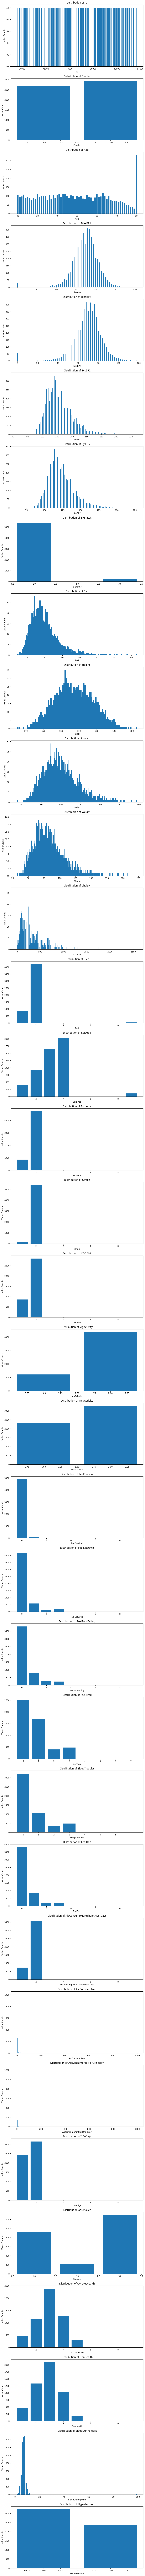

In [195]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_df is already defined

# List of features to plot
features = merged_df.columns

# Create subplots
num_features = len(features)
fig, axes = plt.subplots(num_features, 1, figsize=(10, 5 * num_features))

# Plot each feature's value counts
for i, feature in enumerate(features):
    value_counts = merged_df[feature].value_counts()
    axes[i].bar(value_counts.index, value_counts.values)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Value Counts')
    axes[i].set_title(f'Distribution of {feature}')

# Adjust layout
plt.tight_layout()
plt.show()

In [196]:
# Assuming merged_df is already defined

# Filter rows where BPXDI3 > 90 or BPDSY3 > 130 and PEASCST1 is 1
#filtered_rows = merged_df[((merged_df['BPXDI3'] > 90) | (merged_df['BPXSY3'] > 130)) & (merged_df['PEASCST1'] == 1)]

# Print the filtered rows
#print(filtered_rows)

In [197]:
def one_hot_encode(df):
    # Iterate over specified categorical features for one-hot encoding
    for feature in ['Gender', 'Asthema', 'Stroke', 'VigActivity', 'ModActivity', 'AlcConsumpMoreThanXMostDays', '100Cigs']:
        # Doesn't include 'WorkHoursMoreThan35' - crashes for some reason
        # Perform one-hot encoding on the current feature
        dummies = pd.get_dummies(df[feature], prefix=feature)
        # Drop the original feature from the DataFrame
        df = df.drop(feature, axis=1)
        # Concatenate the one-hot encoded features with the original DataFrame
        df = pd.concat([df, dummies], axis=1)
    
    return df

In [198]:
merged_df = one_hot_encode(merged_df)

In [199]:
merged_df.isnull().sum()

ID                                    0
Age                                   0
DiasBP1                             477
DiasBP2                             281
SysBP1                              477
SysBP2                              281
BPStatus                              0
BMI                                  68
Height                               58
Waist                               318
Weight                               55
CholLvl                             541
Diet                                502
SaltFreq                            502
CDQ001                             1880
FeelSuicidal                        513
FeelLetDown                         512
FeelPoorEating                      511
FeelTired                           511
SleepTroubles                       511
FeelDep                             510
AlcConsumpFreq                     1267
AlcConsumpAmtPerDrinkDay           2137
Smoker                             3145
OvrDietHealth                         0


In [200]:
def drop_features_containing_9(df):
    # Find all columns that contain the number '9' in their names
    columns_to_drop = [column for column in df.columns if '9' in column]
    
    # Drop these columns from the DataFrame
    df.drop(columns=columns_to_drop, inplace=True)

In [201]:
drop_features_containing_9(merged_df)

In [202]:
# Break up features into yes/no categories to determine records where there is a nan
new_column_names = {
    'Gender_1': 'Male',
    'Gender_2': 'NoMale',
    'Asthema_1.0': 'Asthema',
    'Asthema_2.0': 'NoAsthema',
    'Stroke_1.0': 'Stroke',
    'Stroke_2.0': 'NoStroke',
    'VigActivity_1.0': 'VigActivity',
    'VigActivity_2.0': 'NoVigActivity',
    'ModActivity_1.0': 'ModActivity',
    'ModActivity_2.0': 'NoModActivity',
    'AlcConsumpMoreThanXMostDays_1.0': 'AlcConsumpMoreThanXMostDays',
    'AlcConsumpMoreThanXMostDays_2.0': 'NoAlcConsumpMoreThanXMostDays',
    '100Cigs_1.0': '100Cigs',
    '100Cigs_2.0': 'No100Cigs',
}

merged_df.rename(columns=new_column_names, inplace=True)

In [203]:
def nullify_and_drop_if_both_zero(df, primary_feature, secondary_feature):
    # Check if both features are 0/false
    mask = (df[primary_feature] == 0) & (df[secondary_feature] == 0)
    
    # Set values to NaN where both conditions are met
    df.loc[mask, [primary_feature, secondary_feature]] = np.nan
    
    # Drop rows where either feature is now NaN
    df.dropna(subset=[primary_feature, secondary_feature], inplace=True)

In [204]:
nullify_if_both_zero(merged_df, 'Male', 'NoMale')
nullify_if_both_zero(merged_df, 'Asthema', 'NoAsthema')
nullify_if_both_zero(merged_df, 'Stroke', 'NoStroke')
nullify_if_both_zero(merged_df, 'VigActivity', 'NoVigActivity')
nullify_if_both_zero(merged_df, 'AlcConsumpMoreThanXMostDays', 'NoAlcConsumpMoreThanXMostDays')
nullify_if_both_zero(merged_df, '100Cigs', 'No100Cigs')

C:\Users\larry\AppData\Local\Temp\ipykernel_18328\2463554280.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[mask, [primary_feature, No_feature]] = np.nan
C:\Users\larry\AppData\Local\Temp\ipykernel_18328\2463554280.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[mask, [primary_feature, No_feature]] = np.nan
C:\Users\larry\AppData\Local\Temp\ipykernel_18328\2463554280.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[mask, [primary_featu

In [205]:
#Scale yes/sometimes/no
def adjust_feature_values(df, feature_name):
    # Apply the conditions to the specified feature
    df[feature_name] = df[feature_name].apply(lambda x: 0 if x == 2 else (0.5 if x == 3 else np.nan))


In [206]:
adjust_feature_values(merged_df, 'Smoker')

In [207]:
merged_df.isnull().sum()

ID                                  0
Age                                 0
DiasBP1                           477
DiasBP2                           281
SysBP1                            477
SysBP2                            281
BPStatus                            0
BMI                                68
Height                             58
Waist                             318
Weight                             55
CholLvl                           541
Diet                              502
SaltFreq                          502
CDQ001                           1880
FeelSuicidal                      513
FeelLetDown                       512
FeelPoorEating                    511
FeelTired                         511
SleepTroubles                     511
FeelDep                           510
AlcConsumpFreq                   1267
AlcConsumpAmtPerDrinkDay         2137
Smoker                           4070
OvrDietHealth                       0
GenHealth                         464
SleepDuringW